<h1>Homework 4: Training and evaluating predictive models</h1>
<h2>Predictive Analytics using Python (CIS432)</h2>
<h3>Simon Business School</h3>

__Instructor__: Yaron Shaposhnik




### Instructions

In this homework assignment, we will train and evaluate predictive models based on the HELOC dataset. We will reinforce the following concepts and techniques: 
* Preprocessing, imputers, and pipelines
* Model training, Hyper-parameter tuning, grid search, and prediction
* Validation set and cross validation
* Confusion matrix
* Performance metrics

### Answer key

This assignment (as well as others) is graded by comparing your answers (that is, the variables and Python objects you create) with precomputed answers. This allows you to get immediate feedback in order to find your errors and correct them. The downside of this approach is that the grading code is strict and even slight deviations from the desired outputs could result in reduction of points. 

To make this learning experience more efficient, the objects that you are asked to generate are provided to you in the variable `ANSWER_KEY`. Questions may ask you to assign some value (like a number or object such as data frame) to some variable. 
For example, you might be asked to assign the variable `n_rows` with some value. To view the correct answer simply run the command `ANSWER_KEY['n_rows']`. 

Note that the answer key is provided to you __for debugging purposes only__. Using it in your final submission or hard-coding solutions __will be considered plagiarism__ and be reported to the student disciplinary committee.

In [1]:
# you may ignore this cell
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

if os.name == 'nt':
    ANSWER_KEY_FILE_NAME = "answer_key(win).p"
elif os.name == 'posix':
    ANSWER_KEY_FILE_NAME = "answer_key(unix).p"
else:
    raise Exception('The code was not tested on',os.name)

GENERATE_ANSWER_KEY=False

if GENERATE_ANSWER_KEY: 
    ANSWER_KEY = {} 
else:        
    with open(ANSWER_KEY_FILE_NAME, "rb") as f:
        ANSWER_KEY = pickle.load( f )       

In [2]:
# TODO CHANGE THIS

# example for using answer key
if GENERATE_ANSWER_KEY==False: 
    print(ANSWER_KEY['Y'].head(2))

0    1
1    1
Name: RiskPerformance, dtype: int64


# Beginning of homework 4

# Part 1: Formulating a prediction problem

In the previous assignments we explored the HELOC dataset. 

Load the csv file `heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv` into the variable `df`

In [3]:
df = "replace this string with your answer"

#read csv
df = pd.read_csv("heloc_dataset_v1(exc empty rows.).csv_pre(-1,asis).csv")


In [4]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df']
diff = sol.compare(df, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df'
### END TEST 

In [5]:
ANSWER_KEY['df'].head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
0,55,144,4,84,20,3,0,83,2,3,...,0,0,0,33,-8,8,1,1,69,Bad
1,61,58,15,41,2,4,4,100,-7,0,...,0,0,0,0,-8,0,-8,-8,0,Bad
2,67,66,5,24,9,0,0,100,-7,7,...,0,4,4,53,66,4,2,1,86,Bad
3,66,169,1,73,28,1,1,93,76,6,...,0,5,4,72,83,6,4,3,91,Bad
4,81,333,27,132,12,0,0,100,-7,7,...,0,1,1,51,89,3,1,0,80,Bad


It has 9871 rows and 24 columns. Each row represents a loan taken by a customer, and columns provide information about each customer and loan (for additional information, see the file `heloc_data_dictionary-2.xlsx`). The first 23 columns contain information known to the company prior to the approval of the application based on his/her credit history (i.e., observable information), while the last column (`RiskPerformance`) holds the outcome of granting the loan, specifically, whether or not the customer was late in his/her payments. 

Our goal in this assignment is to predict `RiskPerformance` based on the observable information. 



### (q1)
Initialize the variables `X` to hold the data/design matrix (the first 23 columns containing the features) and `Y` to hold the labels (the last column). Convert the values in `Y` to 1 and 0 for the labels "Bad" and "Good", respectively. This conversion allows us to compute the average value in the column `Y` to estimate the probability of defaulting. For example, averaging over the entire data frame would tell us the percentage of customers who defaulted, while averaging on a subset of customer would tell us the probability that a customer within this group defaults. 

In [6]:
X = "replace this string with your answer"
Y = "replace this string with your answer"

#X
X = df.iloc[:,0:23]

#Y
Y = df.iloc[:,-1]
#convert to 0 and 1
Y = Y.map(dict(Bad = 1, Good = 0))


In [7]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X']
diff = sol.compare(X, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X'
### END TEST 

In [8]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y']
diff = sol.compare(Y, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y'
### END TEST 

`X` should be a matrix (data frame) with 9871 rows and 23 columns, while `Y` is a vector (series) with 9871 values.

In [9]:
ANSWER_KEY['X'].head(2) # illustrate the output

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,55,144,4,84,20,3,0,83,2,3,...,43,0,0,0,33,-8,8,1,1,69
1,61,58,15,41,2,4,4,100,-7,0,...,67,0,0,0,0,-8,0,-8,-8,0


In [10]:
ANSWER_KEY['Y'].head(2) # illustrate the output

0    1
1    1
Name: RiskPerformance, dtype: int64

In [11]:
print(ANSWER_KEY['X'].shape, ANSWER_KEY['Y'].shape)

(9871, 23) (9871,)


### (q2) 

Use the function `train_test_split` to split the data into train and test sets. Allocate 20% of your data to the test set (`test_size=0.2`), and set the parameter `random_state` to 1234. This number was arbitrarily chosen and its purpose is to guarantee that when even the command  `train_test_split` is executed, the data will be partitioned the same way. This is important for replicability (so you and other could replicate the analysis) and to prevent contamination of the test set.

Specifically, initialize the following variables `X_train, X_test, Y_train, Y_test` according to their names (whether they hold the train or test set, of the data matrix `X` or the labels `Y`).

In [12]:
from sklearn.model_selection import train_test_split
X_train = "replace this string with your answer"
X_test  = "replace this string with your answer"
Y_train = "replace this string with your answer"
Y_test  = "replace this string with your answer"

#split df
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1234)


In [13]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_train']
diff = sol.compare(X_train, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_train'
### END TEST 

In [14]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_test']
diff = sol.compare(X_test, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_test'
### END TEST 

In [15]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_train']
diff = sol.compare(Y_train, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_train'
### END TEST 

In [16]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_test']
diff = sol.compare(Y_test, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_test'
### END TEST 

In [17]:
print('The shapes of X_train, X_test, Y_train, Y_test:')
print(ANSWER_KEY['X_train'].shape, ANSWER_KEY['X_test'].shape, ANSWER_KEY['Y_train'].shape, ANSWER_KEY['Y_test'].shape)

The shapes of X_train, X_test, Y_train, Y_test:
(7896, 23) (1975, 23) (7896,) (1975,)


# Part 2: Preprocessing

Recall from previous assignments that our data contains missing values encoded by -7,-8, and -9. We next discuss and apply different techniques to handle missing values and transform our data matrix to become more amenable to learning. 

### (q3)
To facilitate the visualization, combine  `X_train` and `Y_train` to a data frame called `df_train`. 

In [18]:
df_train = "replace this string with your answer"

#combin two train sets
df_train = pd.concat([X_train,Y_train], axis=1)
df_train.head(3)


,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
720,68,60,7,31,11,1,0,92,27,6,...,0,1,1,50,77,5,2,1,88,1
1759,60,123,1,47,18,0,0,100,-7,7,...,0,1,1,90,-8,6,1,5,70,1
3964,65,56,3,21,7,0,0,86,38,6,...,0,3,3,23,98,3,1,1,80,0


In [19]:
# example of output
ANSWER_KEY['df_train'].head(3)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
720,68,60,7,31,11,1,0,92,27,6,...,0,1,1,50,77,5,2,1,88,1
1759,60,123,1,47,18,0,0,100,-7,7,...,0,1,1,90,-8,6,1,5,70,1
3964,65,56,3,21,7,0,0,86,38,6,...,0,3,3,23,98,3,1,1,80,0


In [20]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['df_train']
diff = sol.compare(df_train, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing df_train'
### END TEST 

Let plot the default risk as a function of the feature `ExternalRiskEstimate`. To this end, aggregate the values in the data frame `df_train` by computing the average risk (average value of `RiskPerformance`) per `ExternalRiskEstimate`. Store the results in the series `means` where the values are the risk estimates and indexes are the corresponding values of the `ExternalRiskEstimate`.

Hint: use the function `.groupby()`

In [21]:
means = "replace this string with your answer"

#compute average of RiskPerformance
means = df_train.groupby(['ExternalRiskEstimate']).mean()['RiskPerformance']

print(means)


ExternalRiskEstimate
-9     0.875000
 34    0.000000
 36    1.000000
 37    1.000000
 39    1.000000
 40    1.000000
 41    1.000000
 43    0.600000
 44    1.000000
 45    0.666667
 46    1.000000
 47    1.000000
 48    0.666667
 49    0.750000
 50    0.857143
 51    0.875000
 52    0.727273
 53    0.500000
 54    0.829268
 55    0.877551
 56    0.849057
 57    0.846154
 58    0.851064
 59    0.885870
 60    0.743316
 61    0.816594
 62    0.811224
 63    0.780303
 64    0.730612
 65    0.719178
 66    0.690554
 67    0.713636
 68    0.648387
 69    0.644898
 70    0.605263
 71    0.482759
 72    0.532872
 73    0.545139
 74    0.493274
 75    0.417625
 76    0.383178
 77    0.368201
 78    0.344262
 79    0.313305
 80    0.309013
 81    0.253589
 82    0.235023
 83    0.260116
 84    0.207965
 85    0.176136
 86    0.170854
 87    0.142857
 88    0.165714
 89    0.114754
 90    0.129412
 91    0.150000
 92    0.193548
 93    0.153846
 94    1.000000
Name: RiskPerformance, dtype: float

In [22]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['means']
diff = sol.compare(means, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing means'
### END TEST 

In [23]:
# example of output
print(ANSWER_KEY['means'])

ExternalRiskEstimate
-9     0.875000
 34    0.000000
 36    1.000000
 37    1.000000
 39    1.000000
 40    1.000000
 41    1.000000
 43    0.600000
 44    1.000000
 45    0.666667
 46    1.000000
 47    1.000000
 48    0.666667
 49    0.750000
 50    0.857143
 51    0.875000
 52    0.727273
 53    0.500000
 54    0.829268
 55    0.877551
 56    0.849057
 57    0.846154
 58    0.851064
 59    0.885870
 60    0.743316
 61    0.816594
 62    0.811224
 63    0.780303
 64    0.730612
 65    0.719178
 66    0.690554
 67    0.713636
 68    0.648387
 69    0.644898
 70    0.605263
 71    0.482759
 72    0.532872
 73    0.545139
 74    0.493274
 75    0.417625
 76    0.383178
 77    0.368201
 78    0.344262
 79    0.313305
 80    0.309013
 81    0.253589
 82    0.235023
 83    0.260116
 84    0.207965
 85    0.176136
 86    0.170854
 87    0.142857
 88    0.165714
 89    0.114754
 90    0.129412
 91    0.150000
 92    0.193548
 93    0.153846
 94    1.000000
Name: RiskPerformance, dtype: float

For example, we see 0.875 of the customers whose `ExternalRiskEstimate` is equal to 51 were late on their payments.

Similarly to `means`, create the variable `counts` which counts the number of customers with a certain `ExternalRiskEstimate`.

In [24]:
counts = "replace this string with your answer"

#count the number of customers with a certain ExternalRiskPeroformance
counts = df_train.groupby(['ExternalRiskEstimate']).count()['RiskPerformance']

print(counts)


ExternalRiskEstimate
-9       8
 34      1
 36      1
 37      1
 39      1
 40      2
 41      1
 43      5
 44      2
 45      3
 46      1
 47      5
 48      3
 49      4
 50     14
 51      8
 52     11
 53      2
 54     82
 55     98
 56    159
 57    156
 58    141
 59    184
 60    187
 61    229
 62    196
 63    264
 64    245
 65    292
 66    307
 67    220
 68    310
 69    245
 70    266
 71    232
 72    289
 73    288
 74    223
 75    261
 76    214
 77    239
 78    183
 79    233
 80    233
 81    209
 82    217
 83    173
 84    226
 85    176
 86    199
 87    140
 88    175
 89    122
 90     85
 91     80
 92     31
 93     13
 94      1
Name: RiskPerformance, dtype: int64


In [25]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['counts']
diff = sol.compare(counts, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing counts'
### END TEST 

In [26]:
# example of output
print(ANSWER_KEY['counts'])

ExternalRiskEstimate
-9       8
 34      1
 36      1
 37      1
 39      1
 40      2
 41      1
 43      5
 44      2
 45      3
 46      1
 47      5
 48      3
 49      4
 50     14
 51      8
 52     11
 53      2
 54     82
 55     98
 56    159
 57    156
 58    141
 59    184
 60    187
 61    229
 62    196
 63    264
 64    245
 65    292
 66    307
 67    220
 68    310
 69    245
 70    266
 71    232
 72    289
 73    288
 74    223
 75    261
 76    214
 77    239
 78    183
 79    233
 80    233
 81    209
 82    217
 83    173
 84    226
 85    176
 86    199
 87    140
 88    175
 89    122
 90     85
 91     80
 92     31
 93     13
 94      1
Name: RiskPerformance, dtype: int64


For example, there are 14 customers in the train data for whom `ExternalRiskEstimate=50`.

Let's plot the default risk as a function of the `ExternalRiskEstimate` and the corresponding counts.

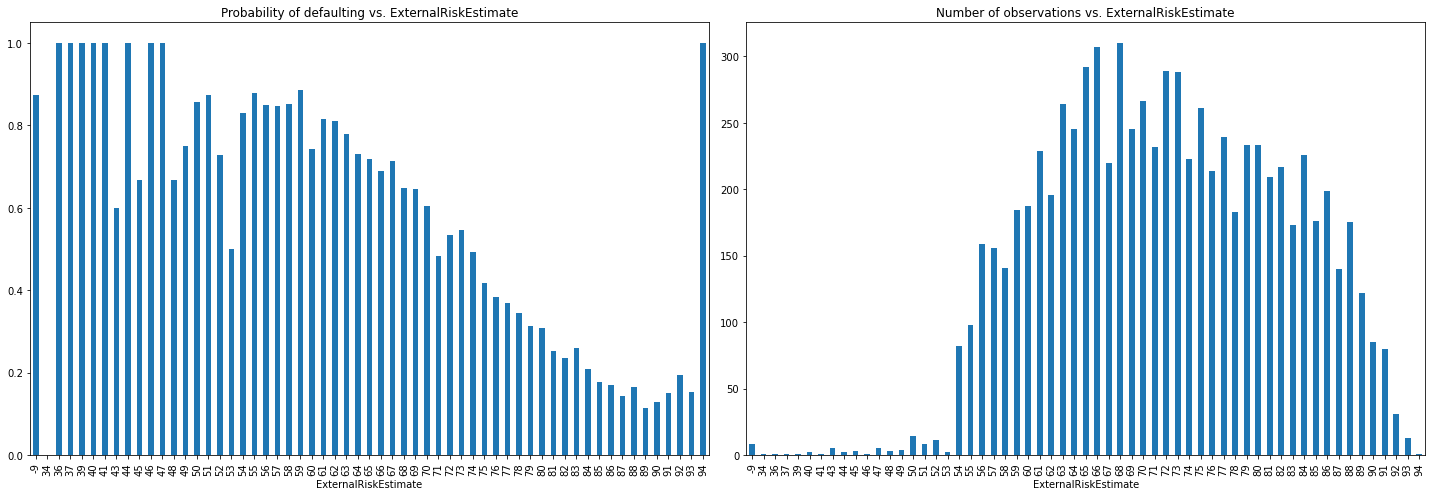

In [27]:
fig, axes = plt.subplots(1,2, figsize=(20,7))
ANSWER_KEY['means'].plot.bar(ax=axes[0], title='Probability of defaulting vs. ExternalRiskEstimate')
ANSWER_KEY['counts'].plot.bar(ax=axes[1], title='Number of observations vs. ExternalRiskEstimate')
plt.tight_layout()

We see that
- The risk of defaulting is, generally, monotoincally decreaing in the `ExternalRiskEstimate` (left figure). This is to be expected from the documentation of the data (see `heloc_data_dictionary-2.xlsx`).
- The number of observations whose `ExternalRiskEstimate` are smaller than 54 or larger than 91 is small (right figure). Therefore, the risk estimate is more noisy in those ranges. Focusing on the interval [54,91] reveals an even stronger trend.
- There is a small number of missing values of `ExternalRiskEstimate` (8 to be exact, see below), and most of them defaulted. 
- Encoding missing values as a small value (-9) makes some sense in that according to the plot, smaller values of  `ExternalRiskEstimate` have higher risk. One is left to wonder why -9? This choice is rather arbitrary (why not -100 or -1000?)

In [28]:
ANSWER_KEY['counts'].loc[-9], ANSWER_KEY['means'].loc[-9] # count the number of observations in the training data where ExternalRiskEstimate is missing, and estimate the probability of defaulting using simple average

(8, 0.875)

__Preprocessing__

In the feature preprocessing stage, we transform the values of the data matrix to facilitate learning. We could replace missing values, apply functions to transform features, or add additional features. 

So what should we do about the missing values in the column `ExternalRiskEstimate`? 
* We could remove rows (observations) or columns (features)    
    - if we remove rows we will loose data from 8 rows out of ~8000. Not too bad if we don't need to remove additional rows because of missing values in other features.
    - removing the column `ExternalRiskEstimate` does not make sense here.
* We could replace missing values
    - with mean/median value of the feature? 
    - with minimal value of the feature? (in our 8 observations the risk was quite high)
    - with a value corresponding to the respective percentile (0.875)?
    - use more sophisticated methods? 


When deciding between the above options, we need to know why the value is missing from our data in the first place. Is it a random glitch in the system? should we expect similar behavior in the future? would we want our model to make predictions when there are missing values in this (or other) features? 


For simplicity, let's assume that whenever the `ExternalRiskEstimate` is missing, we don't want our model to make predictions. Based on this, we will remove from our data any rows where the the `ExternalRiskEstimate` is missing.

Update the variable `X_train, X_test, Y_train, Y_test` by removing any observation where the feature `ExternalRiskEstimate` is missing.

In [29]:
#update Y
Y_train = Y_train[X_train['ExternalRiskEstimate'] != -9]
Y_test = Y_test[X_test['ExternalRiskEstimate'] != -9]

#update X
X_train = X_train[X_train['ExternalRiskEstimate'] != -9]
X_test = X_test[X_test['ExternalRiskEstimate'] != -9]


In [30]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_train_updated']
diff = sol.compare(X_train, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_train'
### END TEST 

In [31]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_test_updated']
diff = sol.compare(X_test, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_test'
### END TEST 

In [32]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_train_updated']
diff = sol.compare(Y_train, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_train'
### END TEST 

In [33]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_test_updated']
diff = sol.compare(Y_test, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_test'
### END TEST 

In [34]:
print('Before removing observations\nThe shapes of X_train, X_test, Y_train, Y_test:')
print(ANSWER_KEY['X_train'].shape, ANSWER_KEY['X_test'].shape, ANSWER_KEY['Y_train'].shape, ANSWER_KEY['Y_test'].shape)

Before removing observations
The shapes of X_train, X_test, Y_train, Y_test:
(7896, 23) (1975, 23) (7896,) (1975,)


In [35]:
print('After removing observations\nThe shapes of X_train, X_test, Y_train, Y_test:')
print(ANSWER_KEY['X_train_updated'].shape, ANSWER_KEY['X_test_updated'].shape, ANSWER_KEY['Y_train_updated'].shape, ANSWER_KEY['Y_test_updated'].shape)

After removing observations
The shapes of X_train, X_test, Y_train, Y_test:
(7888, 23) (1973, 23) (7888,) (1973,)


We see that a total of 10 rows were removed from our data (train and test).

Let's look at the remaining missing values.

In [36]:
# you implemented similar code in one of the previous assignments
df_count_missing = pd.concat([(X_train==-7).sum(), (X_train==-8).sum(), (X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]
df_count_missing

,-7,-8,-9
ExternalRiskEstimate,0,0,0
MSinceOldestTradeOpen,0,199,0
MSinceMostRecentTradeOpen,0,0,0
AverageMInFile,0,0,0
NumSatisfactoryTrades,0,0,0
NumTrades60Ever2DerogPubRec,0,0,0
NumTrades90Ever2DerogPubRec,0,0,0
PercentTradesNeverDelq,0,0,0
MSinceMostRecentDelq,3727,130,0
MaxDelq2PublicRecLast12M,0,0,0


We see that there are no longer `-9` (missing) values in the data. 

We turn to handling the other missing values `-7` and `-8`. Let's assume for simplicity that these values are informative and that whatever generated them in the data that we have would generate them also in the future. This could be a reasonable assumption, for example, for feature `MSinceMostRecentDelq` that indicates the number of months since last delinquency, where for customers who were never late on their payments the corresponding values is missing. 

In [37]:
### BEGIN HIDDEN TEST
if GENERATE_ANSWER_KEY and 0: 
    feature = 'MSinceMostRecentDelq'
    means = df_train.groupby(feature)['RiskPerformance'].mean()
    counts = df_train.groupby(feature)['RiskPerformance'].count()
    fig, axes = plt.subplots(1,2, figsize=(20,7))
    means.plot.bar(ax=axes[0], title='Probability of defaulting vs. ExternalRiskEstimate')
    counts.plot.bar(ax=axes[1], title='Number of observations vs. ExternalRiskEstimate')
    plt.tight_layout()
    plt.savefig('Risk vs MSinceMostRecentDelq.png')
### END HIDDEN TEST

Let's create a similar plot of risk vs. `MSinceMostRecentDelq`:
<img src='Risk vs MSinceMostRecentDelq.png'>

We see that
- Risk is generally decreasing in `MSinceMostRecentDelq` (as the data documentation suggests `heloc_data_dictionary-2.xlsx`).
- The risk at -7 and -8 seems to behave differently from the rest. It is not clear that setting the missing values to -7 and -8 is right (these values seem to break the trend).
- The number of observations drops as `MSinceMostRecentDelq` increases.

Let's focus on the non-negative values.

In [38]:
### BEGIN HIDDEN TEST
if GENERATE_ANSWER_KEY and 0: 
    feature = 'MSinceMostRecentDelq'
    means = df_train.groupby(feature)['RiskPerformance'].mean()
    counts = df_train.groupby(feature)['RiskPerformance'].count()
    fig, axes = plt.subplots(1,2, figsize=(20,7))
    means[means.index>=0].plot.bar(ax=axes[0], title='Probability of defaulting vs. ExternalRiskEstimate')
    counts[counts.index>=0].plot.bar(ax=axes[1], title='Number of observations vs. ExternalRiskEstimate')
    plt.tight_layout()
    plt.savefig('Risk vs MSinceMostRecentDelq - no missing.png')
### END HIDDEN TEST

<img src='Risk vs MSinceMostRecentDelq - no missing.png'>

The trend seems stronger now (especially when `MSinceMostRecentDelq` is not too large where the number customers' count is relatively larger)

So how should we transform the values of the feature `MSinceMostRecentDelq`? 
* We could add dummy variables to indicate the values -7 and -8. This way our predictive models could adjust to these special values. 
* In some cases, it could make sense to replace the missing values with average/median values of each column. 
* There are more sophisticated methods, some of which are implemented in scikit-learn (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute). Additional methods can be found in the academic literature (e.g., you could search for "impute missing values" on Google Scholar: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C33&q=impute+missing+values&btnG=).
* Another approach is to manually inspect the figure above. For example, we might conjecture that the functional relation between risk and `MSinceMostRecentDelq` is monotonically decreasing up to a certain point (perhaps 50?) and then it is constant. We might try to add a binary feature such as `MSinceMostRecentDelq>50` and/or `max(50-MSinceMostRecentDelq,0)`. As another example, if we're trying to fit a linear model, we might apply a transformation using the logarithmic or exponential function to make this function more linear or more evenly distributed.



In practice, one should think carefully when transforming each feature and understand the causes of missing values. Due to lack of access to the process that generated this data, and for our educational purposes, we will apply the following transformation:
1. For every column with missing values (-7 or -8), we add a feature with the same name, concatenated by the term "=-7" or "=-8". For example, for the feature `MSinceMostRecentDelq`, we will add the binary features `MSinceMostRecentDelq=-7` and `MSinceMostRecentDelq=-8`, which are equal to 1 when the value under   `MSinceMostRecentDelq` is equal to `-7` and `-8`, respectively.
2. We will replace the missing values of each feature by the average value of the respective feature.  


To this end, we will use scikit-learn preprocessing functions. Let's start with a small example:

In [39]:
X1 = np.array([[ -7,  1,  2],
               [  4,  0, -7],
               [ -8,  1, -7],
               [ 10, 20, 30]])
df1 = pd.DataFrame(X1, columns=['A','B','C'])
df1

,A,B,C
0,-7,1,2
1,4,0,-7
2,-8,1,-7
3,10,20,30


We created the dataframe `df1` that has three columns "A","B","C", which contains some missing values indicated by `-7` and `-8`. 

We next use the scikit-learn object `MissingIndicator` to transform the dataframe into a dataframe that only contain indicators for missing values.

In [40]:
from sklearn.impute import MissingIndicator
minus_7_indicator_transformer = MissingIndicator(missing_values=-7, features='missing-only').fit(df1)
minus_7_indicator_transformer

MissingIndicator(missing_values=-7)

The above code created a transformer (an objects that transforms data matrixes and features) called `minus_7_indicators`. Using the parameters `missing_values=-7`, we specified that  -7 is the value being used to denote missing values. The other parameter `features='missing-only`  specifies that we will only keep columns with missing values. In our case, Columns A and C contain missing values but not column B. If we apply the transformation we would get two columns, one indicating missing values in column A and the second indicating missing values in column C:

In [41]:
arr1_t = minus_7_indicator_transformer.transform(df1)
arr1_t

array([[ True, False],
       [False,  True],
       [False,  True],
       [False, False]])

The variable `arr1_t` (which stands for array 1 transformed) contains the transformed values. Notice that the value `-8` has not been transformed since we only specified -7 as missing value (by setting `missing_values=-7`).
Running `minus_7_indicators.features_` will tell us which of the columns were transformed:

In [42]:
minus_7_indicator_transformer.features_

array([0, 2])

These are the first and last columns of `df1`, which correspond to A and C:

In [43]:
df1.columns.values[minus_7_indicator_transformer.features_]

array(['A', 'C'], dtype=object)

An advantage of defining this transformer is that it can be applied to new data points: 

In [44]:
minus_7_indicator_transformer.transform([[1,1,-7]]) # A is not missing here, and C is missing (this is the output of transforming this new observation)

array([[False,  True]])

Similarly, let's create additional features for the missing value -8: 

In [45]:
minus_8_indicator_transformer = MissingIndicator(missing_values=-8, features='missing-only').fit(df1) # notice the -8
arr2_t = minus_8_indicator_transformer.transform(df1)
arr2_t

array([[False],
       [False],
       [ True],
       [False]])

In [46]:
minus_8_indicator_transformer.features_

array([0])

In [47]:
df1.columns.values[minus_8_indicator_transformer.features_]

array(['A'], dtype=object)

The dataframe `df1` only contains 1 value of -8 in the column A, which is why the transformer `minus_8_indicator_transformer` returns a single column.

There are a few more steps that we are left to do: 
1. combine df1, arr1_t, and arr2_t into a single dataframe or array
2. set the appropriate feature names (for convenience)
3. replace missing values with average values in each column

To combine the original data frame (`df1`) and the new features (`arr1_t` and `arr2_t`), we will use scikit-learn's `FeatureUnion` object. Before we do that, we define another transformer (which takes a dataframe and returns one transformed according to some login), which in our case does nothing. We will call it `do_nothing_imputer`.

In [48]:
# a "do nothing" imputer (will be useful soon)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')
do_nothing_imputer.fit_transform(df1)

array([[-7,  1,  2],
       [ 4,  0, -7],
       [-8,  1, -7],
       [10, 20, 30]])

In [49]:
print(df1)

    A   B   C
0  -7   1   2
1   4   0  -7
2  -8   1  -7
3  10  20  30


We see that we get the exact same output, with the exception of the data being returned as a numpy array.

In [50]:
from sklearn.pipeline import FeatureUnion
union = FeatureUnion([("do nothing", do_nothing_imputer),
                      ("missing_minus_7", MissingIndicator(missing_values=-7, features='missing-only')),
                      ("missing_minus_8", MissingIndicator(missing_values=-8, features='missing-only'))])
arr1_extended = union.fit_transform(df1)
arr1_extended

array([[-7,  1,  2,  1,  0,  0],
       [ 4,  0, -7,  0,  1,  0],
       [-8,  1, -7,  0,  1,  1],
       [10, 20, 30,  0,  0,  0]])

FeatureUnion takes a dataframe (or array) and creates multiple copies of it (3 above, one corresponding to each element of the list given to it as a parameter). Each copy is sent through a transformer that transforms the datamatrix (such as `minus_8_indicator_transformer` we defined earlier). Finally, the transformed copies are combined (the union operation in math combines sets of elements, and in this case, sets of features). 

The first transformer which we call "do nothing" only passes the copied data it received. This is because we would like to extend the features space, but also keep the original features. The second and third transformers add binary features for columns with missing values of -7 and -8, respectively (this is equivalent to what we've done earlier).

The result is stored in `arr1_extended`. The first 3 columns are the original features, the next two columns indicate missing values of -7 in columns A and C, and the last column indicates missing values in column A. The information about the column names, however, is not shown above as the returned value is an array. We will therefore add columns manually.

We can obtain the original features names from the dataframe `df1`:

In [51]:
print(df1.columns.values.tolist()) # these are the original features

['A', 'B', 'C']


We can obtain the next two features from the transformer `minus_7_indicator_transformer`, mapping the column indexes to feature names:

In [52]:
col_names_minus_7 = df1.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7  # these two columns indicate missing value of -7

['A', 'C']

We add the text "-7" to indicate that these binary columns represent missing values of -7. We use Python's built-in function `map` to apply a function to each element of a list. In this case, the function simply concatenates the string '=-7' to each element in list of column names.

In [53]:
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) # we run over the pervious value
col_names_minus_7

['A=-7', 'C=-7']

We do the same for the last column, which corresponds to missing values of -8:

In [54]:
col_names_minus_8 = df1.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))
col_names_minus_8

['A=-8']

Putting it all together, we get the following list of column names:

In [55]:
columns_all = df1.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
columns_all

['A', 'B', 'C', 'A=-7', 'C=-7', 'A=-8']

Using the combined array `arr1_extended` and the complete list of column names `columns_all`, we create the dataframe `df1_t` (where t stands for transformed).

In [56]:
df1_t = pd.DataFrame(arr1_extended, columns=columns_all)
df1_t

,A,B,C,A=-7,C=-7,A=-8
0,-7,1,2,1,0,0
1,4,0,-7,0,1,0
2,-8,1,-7,0,1,1
3,10,20,30,0,0,0


Finally, we replace missing values of -7 and -8 with the average values in each column. While a bit convoluted, we do it in two steps, first transforming values of -7 to -8, and then replacing all values of -8 with the mean values. (This is due to a limitation of scikit-learn where `SimpleImputer` only accept one value as indicating missing values).

In [57]:
arr1_t2 = SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8).fit_transform(df1_t)
arr1_t2 

array([[-8,  1,  2,  1,  0,  0],
       [ 4,  0, -8,  0,  1,  0],
       [-8,  1, -8,  0,  1,  1],
       [10, 20, 30,  0,  0,  0]])

In [58]:
arr1_t3 = SimpleImputer(missing_values=-8, strategy='mean').fit_transform(arr1_t2)
arr1_t3

array([[ 7.,  1.,  2.,  1.,  0.,  0.],
       [ 4.,  0., 16.,  0.,  1.,  0.],
       [ 7.,  1., 16.,  0.,  1.,  1.],
       [10., 20., 30.,  0.,  0.,  0.]])

We see that `arr1_t2` is similar to `df1_t` with values of -7 replaced by -8. In `arr1_t3` we further replace -8 with the average value in each column (check for yourself).

We write the entire transformation code in the following code cell.

In [59]:
from sklearn.pipeline import Pipeline

do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])
 
pipe_example = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean'))])

arr1_transformed = pipe_example.fit_transform(df1)
arr1_transformed

array([[ 7.,  1.,  2.,  1.,  0.,  0.],
       [ 4.,  0., 16.,  0.,  1.,  0.],
       [ 7.,  1., 16.,  0.,  1.,  1.],
       [10., 20., 30.,  0.,  0.,  0.]])

* do_nothing_imputer: transformer that returns the exact input
* feature_expansion: a transformer that copies its input 3 times and send each copy to the transformers "do nothing", "add features for -7", and "add features for -8"
* pipe: a transformer that first applies "feature_expansion" (defined earlier), then applies "replace -7 with -8", and finally applies "replace -8 with mean". 
* when we run pipe_example.fit_transform(df1) we perform the transformations in pipe_example on the values in df1
* we store the transformed values in `arr1_transformed`


Below is the code that produces the column names of the transformed data matrix:

In [60]:
col_names_minus_7 = df1.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) 
col_names_minus_8 = df1.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))
columns_all = df1.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
columns_all

['A', 'B', 'C', 'A=-7', 'C=-7', 'A=-8']

And finally, we combine the transformed matrix with the column names.

In [61]:
df1_t = pd.DataFrame(arr1_transformed, columns=columns_all)
df1_t

,A,B,C,A=-7,C=-7,A=-8
0,7.0,1.0,2.0,1.0,0.0,0.0
1,4.0,0.0,16.0,0.0,1.0,0.0
2,7.0,1.0,16.0,0.0,1.0,1.0
3,10.0,20.0,30.0,0.0,0.0,0.0


### (q4)

Similarly to the example above, assign to the variable `pipeline` a pipeline that extends `X_train` with binary variables that indicate missing values of -7 and -8 in each of the columns, and replaces the missing values with the average value in each column. Then apply it to transform our training data `X_train` into the array `arr_X_train_t`.

In [62]:
pipeline = "replace this string with your answer"
arr_X_train_t = "replace this string with your answer"

#create a pipeline
pipeline = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean'))])

#replace missing values
arr_X_train_t = pipeline.fit_transform(X_train)


In [63]:
### BEGIN TEST
assert(arr_X_train_t.shape == ANSWER_KEY['arr_X_train_t'].shape), 'test if the dimensions of arr_X_train_t are correct'
assert(np.isclose(ANSWER_KEY['arr_X_train_t'], arr_X_train_t, rtol=0, atol=0.01).all()), 'testing arr_X_train_t'
### END TEST

In [64]:
print('The dimensions of X_train:',X_train.shape)
print('The dimensions of the transformed X_train:',ANSWER_KEY['arr_X_train_t'].shape)

The dimensions of X_train: (7888, 23)
The dimensions of the transformed X_train: (7888, 34)


Observe that our transformation did not change the number of rows (observations), only the number of features.

Set the variable `column_names` to hold the list of column names of the transformed dataset.

In [65]:
column_names = "replace this string with your answer"

#get transform information
trans_minus_7 = minus_7_indicator_transformer.fit_transform(X_train)
trans_minus_8 = minus_8_indicator_transformer.fit_transform(X_train)

#assign new column names
col_names_minus_7 = X_train.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) 
col_names_minus_8 = X_train.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))

#hold column names
column_names = X_train.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
column_names

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'MSinceMostRecentDelq=-7',
 'MSinceMostRecentInqexcl7days=-7',
 'MSinceOldestTradeOpen=-8',
 'MSinceMostRecentDelq=-8',
 'MSinceMostRecentInqexcl7days=-8',
 'NetFractionRevolvingBurden=-8',
 'NetFractionInstallBurden=-8',
 'NumRevolvingTradesWBalance=-8',
 'NumInstallTradesWBalance=-8',
 'NumBank2NatlTradesWHighUtilization=-8',
 'PercentTradesWBalance=-8']

In [66]:
# expected output
ANSWER_KEY['column_names']

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'MSinceMostRecentDelq=-7',
 'MSinceMostRecentInqexcl7days=-7',
 'MSinceOldestTradeOpen=-8',
 'MSinceMostRecentDelq=-8',
 'MSinceMostRecentInqexcl7days=-8',
 'NetFractionRevolvingBurden=-8',
 'NetFractionInstallBurden=-8',
 'NumRevolvingTradesWBalance=-8',
 'NumInstallTradesWBalance=-8',
 'NumBank2NatlTradesWHighUtilization=-8',
 'PercentTradesWBalance=-8']

In [67]:
### BEGIN TEST
assert(ANSWER_KEY['column_names'] == column_names), 'test column_names'
### END TEST

Set the variable `X_train_t` to the dataframe holding the transformed data (similar to arr_X_train_t only with the appropriate column names).

In [68]:
X_train_t = "replace this string with your answer"

#transform to dataframe
X_train_t = pd.DataFrame(arr_X_train_t,columns=column_names)


In [69]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_train_t']
diff = sol.compare(X_train_t)
assert(len(diff)==0), 'testing X_train_t'
### END TEST 

Let's look at the transformed dataset

In [70]:
ANSWER_KEY['X_train_t'].describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
count,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,...,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000
mean,72.012170,201.111198,9.539300,78.839630,21.197008,0.585446,0.386029,92.263058,21.751675,5.749366,...,0.185345,0.025228,0.016481,0.047033,0.018002,0.347490,0.015467,0.086968,0.059077,0.000887
std,9.896349,96.794766,12.498854,33.845501,11.349714,1.234844,0.985603,11.982475,14.729127,1.657175,...,0.388602,0.156827,0.127323,0.211724,0.132967,0.476203,0.123407,0.281805,0.235784,0.029778
min,34.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,137.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.000000,14.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,188.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.000000,21.751675,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,255.000000,12.000000,96.000000,28.000000,1.000000,0.000000,100.000000,21.751675,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,94.000000,803.000000,227.000000,322.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We observe that 
* there are now 34 features (versus the original 23)
* Missing values were transformed (the minimal value in each column is no longer -7 or -8)

We can conveniently see the list of features using the function `.info()`

In [71]:
X_train_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888 entries, 0 to 7887
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ExternalRiskEstimate                   7888 non-null   float64
 1   MSinceOldestTradeOpen                  7888 non-null   float64
 2   MSinceMostRecentTradeOpen              7888 non-null   float64
 3   AverageMInFile                         7888 non-null   float64
 4   NumSatisfactoryTrades                  7888 non-null   float64
 5   NumTrades60Ever2DerogPubRec            7888 non-null   float64
 6   NumTrades90Ever2DerogPubRec            7888 non-null   float64
 7   PercentTradesNeverDelq                 7888 non-null   float64
 8   MSinceMostRecentDelq                   7888 non-null   float64
 9   MaxDelq2PublicRecLast12M               7888 non-null   float64
 10  MaxDelqEver                            7888 non-null   float64
 11  NumT

Let's stop for a second and think. Why did we create this pipeline? Why not simply use pandas function, Python for loop, etc.? 

The reason is that we are going to train a model on the transformed dataset. That is, the model will expect 34 features (rather than the original 23 features). What if we need to make prediction about a new observation? This new observation is likely to be formatted in the original features space (from which there are 23 features). We must therefore transform it before making prediction. If we do it in pandas and Python, we need to duplicate the entire transformation code to do just that. 

This is how we do it in scikit-learn once we define pipelines. Suppose that our new data consists of observations 3 and 7 in the test set.

In [72]:
new_data =  X_test.iloc[[3,7],:]
new_data

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
5880,73,445,15,125,12,0,0,83,21,6,...,42,0,1,1,55,-8,4,1,1,100
8533,60,198,19,57,19,0,0,90,6,4,...,62,-7,0,0,71,71,6,3,1,100


In [73]:
new_data_t = pipeline.transform(new_data) # Notice that we run transform() and not fit_transform()!
new_data_t = pd.DataFrame(new_data_t, columns=column_names)
new_data_t

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,73.0,445.0,15.0,125.0,12.0,0.0,0.0,83.0,21.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,60.0,198.0,19.0,57.0,19.0,0.0,0.0,90.0,6.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


That's all. The dataframe `new_data_t`  contains the transformed (expanded and imputed) data. This was done using 2 lines of code!

Transform the test set `X_test` using the pipeline and create the data frame `X_test_t` which contains the transformed data and the column names. 

In [74]:
X_test_t = "replace this string with your answer"

#transform new data set
X_test_t = pd.DataFrame(pipeline.transform(X_test),columns=column_names)


In [75]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_test_t']
diff = sol.compare(X_test_t)
assert(len(diff)==0), 'testing X_test_t'
### END TEST 

In [76]:
# expected output
ANSWER_KEY['X_test_t'].head(2)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days=-7,MSinceOldestTradeOpen=-8,MSinceMostRecentDelq=-8,MSinceMostRecentInqexcl7days=-8,NetFractionRevolvingBurden=-8,NetFractionInstallBurden=-8,NumRevolvingTradesWBalance=-8,NumInstallTradesWBalance=-8,NumBank2NatlTradesWHighUtilization=-8,PercentTradesWBalance=-8
0,70.0,206.0,3.0,96.0,18.0,3.0,0.0,59.0,11.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42.0,179.0,1.0,72.0,50.0,9.0,6.0,69.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


If you got the answer right, you noticed the difference in applying transformers to the train and test sets
- train: pipeline.fit_transform(X_train)
- test: pipeline.transform(X_test)

When we run `.fit()` or `.fit_transform()` the transformer learns from the data given to it. For example, in the command

    SimpleImputer(missing_values=-8, strategy='mean').fit_transform(arr1_t2)
    
we learned the mean values in each column of `arr1_t2` so we could use it to impute missing values. The function `fit` learns how to impute missing values using the given data, the function `transform` performs the transformation, and the function `fit_transform` does both. To avoid data leakage between the test and train sets, it is important that we only learn from training data and not from the test data prior to evaluating our models using the test data.

# Part 3: Model training and evaluation

Now that we now have a pipeline that preprocessed the data, we can start training models. We will train 3 models: classification tree, logistic regression, and K-nearest neighbors. 

We will use two methods for evaluation: validation set (simple cross validation) and cross-validation



## Validation set

Let' further split the train data to train and validation sets.

### (q5) 

Use the function `train_test_split` to split `X_train_t` into train and validation sets called. Allocate 25% of the train data  to the validation set (`test_size=0.25`), and set the parameter `random_state` to 1234. Initialize the following variables `X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val` according to their names (whether they hold the train or validation set, of the data matrix `X` or the labels `Y`).

In [77]:
X_train_t_tr  = "replace this string with your answer"
X_train_t_val = "replace this string with your answer"
Y_train_t_tr  = "replace this string with your answer"
Y_train_t_val = "replace this string with your answer"

#split training data into train and validation sets
X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val = train_test_split(X_train_t,Y_train, test_size=0.25, random_state=1234)



In [78]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_train_t_tr']
diff = sol.compare(X_train_t_tr, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_train_t_tr'
### END TEST 

In [79]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['X_train_t_val']
diff = sol.compare(X_train_t_val, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing X_train_t_val'
### END TEST 

In [80]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_train_t_tr']
diff = sol.compare(Y_train_t_tr, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_train_t_tr'
### END TEST 

In [81]:
### BEGIN TEST (DO NOT REMOVE CELL)
sol = ANSWER_KEY['Y_train_t_val']
diff = sol.compare(Y_train_t_val, keep_equal=False, align_axis=0)
assert(len(diff)==0), 'testing Y_train_t_val'
### END TEST 

In [82]:
print('The shape of X:', X.shape)
print('The shape of X_test_t:', X_test_t.shape)
print('The shape of X_train_t:', X_train_t.shape)
print('The shapes of X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val:', ANSWER_KEY['X_train_t_tr'].shape, ANSWER_KEY['X_train_t_val'].shape, ANSWER_KEY['Y_train_t_tr'].shape, ANSWER_KEY['Y_train_t_val'].shape)

The shape of X: (9871, 23)
The shape of X_test_t: (1973, 34)
The shape of X_train_t: (7888, 34)
The shapes of X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val: (5916, 34) (1972, 34) (5916,) (1972,)


In [83]:
print('The proportion of train:validation:test data is %.1f:%.1f:%.1f'%(len(Y_train_t_tr)/len(Y), len(Y_train_t_val)/len(Y), len(Y_test)/len(Y)))

The proportion of train:validation:test data is 0.6:0.2:0.2


When we use the validation set approach, we use 60% of the data to train models (`X_train_t_tr`,`Y_train_t_tr`), we use 20% of the data for model selection (`X_train_t_val`,`Y_train_t_val`), and the remaining 20% for final evaluation (`X_test_t_tr`,`Y_test`)

Let's train models!

In [84]:
from sklearn import tree, linear_model, neighbors            
clf_tree    = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

The parameter `max_iter` was set to 10000 in the logistic regression model to ensure that the algorithm converges, that is,  the estimation process reached steady parameter values as part of its execution. 

Next, we evaluate the performance of the models on the validation set.

In [85]:
from sklearn.metrics import accuracy_score
print('Decision tree accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regression accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN accuracy: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))

Decision tree accuracy: 0.618
Logistic regression accuracy: 0.731
KNN accuracy: 0.669


Observe that models can be controlled by various hyper-parameters that could have big impact over their behavior: 

    DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)    
    
    LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    
    KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
    

Knowing about how each model works is important to tune the hyper-parameters. Additionally, scikit-learn offers some functions to automate this process. We'll get back to this later.

### (q6)

Let's use cross-validation to evaluate models.

In [86]:
clf_tree    = tree.DecisionTreeClassifier().fit(X_train_t_tr, Y_train_t_tr)
clf_log_reg = linear_model.LogisticRegression(max_iter=10000).fit(X_train_t_tr, Y_train_t_tr) 
clf_knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)

In [87]:
from sklearn.model_selection import cross_validate
cv_results_tree = cross_validate(tree.DecisionTreeClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_log_reg = cross_validate(linear_model.LogisticRegression(max_iter=10000), X_train_t, Y_train, cv=5, return_estimator=True)
cv_results_knn = cross_validate(neighbors.KNeighborsClassifier(), X_train_t, Y_train, cv=5, return_estimator=True)

Notice that we run the cross validation on the entire training data `X_train_t` (which includes the previously separated validation set). The cross-validation assures that we evaluate model performance on data that was not used in its training. Note that the running time is 5 times longer.

Let's inspect the returned object.

In [88]:
cv_results_tree

{'fit_time': array([0.08263302, 0.06733799, 0.06520081, 0.06394506, 0.0672183 ]),
 'score_time': array([0.00334883, 0.00273991, 0.00251818, 0.00235415, 0.00212979]),
 'estimator': (DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()),
 'test_score': array([0.63624842, 0.64131812, 0.64512041, 0.64172479, 0.63031072])}

In [89]:
cv_results_tree['test_score'] # these are 5 evaluations (since we specified cv=5)

array([0.63624842, 0.64131812, 0.64512041, 0.64172479, 0.63031072])

In [90]:
print('Classification tree - CV accuracy score %.3f'%cv_results_tree['test_score'].mean()) # this is their average value
print('Logistic regresion - CV accuracy score %.3f'%cv_results_log_reg['test_score'].mean()) # this is their average value
print('KNN - CV accuracy score %.3f'%cv_results_knn['test_score'].mean()) # this is their average value

Classification tree - CV accuracy score 0.639
Logistic regresion - CV accuracy score 0.740
KNN - CV accuracy score 0.675


Reminder: these are the validation set scores

In [91]:
print('Classification tree - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_tree.predict(X_train_t_val)))
print('Logistic regresion - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_log_reg.predict(X_train_t_val)))
print('KNN - validation accuracy score: %.3f'%accuracy_score(Y_train_t_val, clf_knn.predict(X_train_t_val)))

Classification tree - validation accuracy score: 0.622
Logistic regresion - validation accuracy score: 0.731
KNN - validation accuracy score: 0.669


CV tends to be more accurate but slower compared to validation set. If we have a large dataset, validation set would typically be sufficient.

Typically, we would explore more models at this point, and try to narrow down the list to a few promising models. Next we would perform hyper-parameter tuning to try improve their performance. Here, we will focus only on the logistic regression model. We will use `GridSearchCV` to perform hyperparameter tuning.

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth':[1,2,3,4,5],  
               'criterion':["gini", "entropy"],            
               'min_samples_split':[2,5,10],              
               'min_samples_leaf':[10,20,30]}]
clf_tree = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf_tree, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_t,Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'min_samples_leaf': [10, 20, 30],
                          'min_samples_split': [2, 5, 10]}],
             scoring='accuracy')

In [93]:
cvres = grid_search.cv_results_ # the variable that stores the grid search results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):  # iterate over the tested configurations
    print(mean_score, params)

0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 5}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 10}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 2}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 5}
0.7122206200606379 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 10}
0.7122206200606379 {'criterion': 'gini', 'max_depth'

With some effort we improved the accuracy of decision trees from 64% to 71%. 

These are the best hyper-parameters we found so far

In [94]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

And this is the classifier that was trained on the entire train data after completing the cross validation and choosing the best configuration.

In [95]:
grid_search.best_estimator_ # variable holding the best classifier (fitted on the entire dataset)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In the validation set approach, we would typically do something similar. Once we selected the best model and hyper parameters, we would train a model on the entire train data (train+validation).

Note that while we used accuracy for model selection (recall using `scoring='accuracy'` in `GridSearchCV`), this need not be our only or even main criterion. Let's compute a few other metrics that are commonly used in practice. 

Let's train a model on the train set which we can evaluate on the validation set.

In [96]:
clf_tree = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=20).fit(X_train_t_tr, Y_train_t_tr)

Note that while we used accuracy for model selection (recall using `scoring='accuracy'` in `GridSearchCV`), this need not be our only or even main criterion. Let's compute a few other metrics that are commonly used in practice. 

In the following questions initialize the variables to their respective values. You may use the lecture notes on "The mechanics of ML", Wikipedia (https://en.wikipedia.org/wiki/Precision_and_recall), and scikit-learn documentation (https://scikit-learn.org/stable/modules/model_evaluation.html).

* conf_matrix: the confusion matrix where columns represent predictions (0,1) and rows the true labels (0,1). Note that this is opposite to the convention in the Wikipedia webpage above (but is consistent with scikit-learn).


In [98]:
conf_matrix = "replace this string with your answer"
#import confusion matrix
from sklearn.metrics import confusion_matrix
#construct confusion matrix
conf_matrix = confusion_matrix(Y_train_t_val,clf_tree.predict(X_train_t_val))
conf_matrix

array([[598, 354],
       [240, 780]])

In [99]:
# expected output
print(ANSWER_KEY['conf_matrix'])

[[598 354]
 [240 780]]


In [100]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['conf_matrix'], conf_matrix, rtol=0, atol=0.01).all()), 'testing conf_matrix'
### END TEST

In [101]:
accuracy = "replace this string with your answer"
tn = "replace this string with your answer"
fp = "replace this string with your answer"
fn = "replace this string with your answer"
tp = "replace this string with your answer"
tpr = "replace this string with your answer"
fpr = "replace this string with your answer"
tnr = "replace this string with your answer"
fnr = "replace this string with your answer"
recall = "replace this string with your answer"
precision = "replace this string with your answer"

#accuracy
accuracy = accuracy_score(Y_train_t_val,clf_tree.predict(X_train_t_val))

#truth table
tn, fp, fn, tp = confusion_matrix(Y_train_t_val,clf_tree.predict(X_train_t_val)).ravel()

#fpr(false positive),tpr(true positive)
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)

#fnr(false negative),tnr(true negative)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)

#recall score
recall = tp / (tp + fn)

#precision score
precision = tp / (tp + fp)


In [102]:
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(ANSWER_KEY['accuracy'], ANSWER_KEY['recall'], ANSWER_KEY['precision']),'\n')
print("Put differently, our predictions are correct %.0f%% of the time, the model catches %.0f%% of the defaulting customers, and the model is correct %.0f%% of times it predicts 'Bad'."%(ANSWER_KEY['accuracy']*100, ANSWER_KEY['recall']*100, ANSWER_KEY['precision']*100))

Accuracy: 0.70, Recall: 0.76, Precision: 0.69 

Put differently, our predictions are correct 70% of the time, the model catches 76% of the defaulting customers, and the model is correct 69% of times it predicts 'Bad'.


In [103]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['accuracy'], accuracy, rtol=0, atol=0.01).all()), 'testing accuracy'
### END TEST

In [104]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['tn'], tn, rtol=0, atol=0.01).all()), 'testing tn'
### END TEST

In [105]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['fp'], fp, rtol=0, atol=0.01).all()), 'testing fp'
### END TEST

In [106]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['fn'], fn, rtol=0, atol=0.01).all()), 'testing fn'
### END TEST

In [107]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['tp'], tp, rtol=0, atol=0.01).all()), 'testing tp'
### END TEST

In [108]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['fpr'], fpr, rtol=0, atol=0.01).all()), 'testing fpr'
### END TEST

In [109]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['tpr'], tpr, rtol=0, atol=0.01).all()), 'testing tpr'
### END TEST

In [110]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['tnr'], tnr, rtol=0, atol=0.01).all()), 'testing tnr'
### END TEST

In [111]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['fnr'], fnr, rtol=0, atol=0.01).all()), 'testing fnr'
### END TEST

In [112]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['recall'], recall, rtol=0, atol=0.01).all()), 'testing recall'
### END TEST

In [113]:
### BEGIN TEST
assert(np.isclose(ANSWER_KEY['precision'], precision, rtol=0, atol=0.01).all()), 'testing precision'
### END TEST

Finally, let's draw the ROC curve for our model `clf_tree`

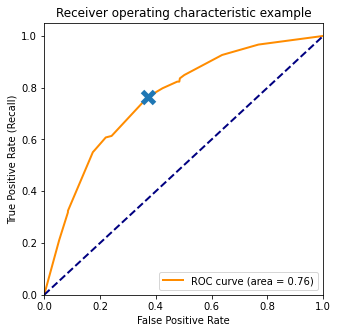

In [114]:
from sklearn import metrics
scores = clf_tree.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right");
plt.plot([ANSWER_KEY['fpr']], [ANSWER_KEY['recall']], marker="x", markeredgewidth=5, markersize=12);

The ROC curve simultaneously shows a series of models that differ by a certain threshold value, often by the probability distribution. The 'x' marks the trained model `clf_tree`, however, by slightly modifying the threshold we could move along the ROC curve to find a better tradeoff between Recall and FPR. 

# Summary


In this homework assignment, we practiced the mechanics of training and evaluating predictive models. By now, you should be familiar with the following concepts: 
* Preprocessing, imputers, and pipelines
* Model training, Hyper-parameter tuning, grid search, and prediction
* Validation set and cross validation
* Confusion matrix
* Performance metrics

While this exercise illustrated the main steps of training and evaluating predictive models, in practice you will face other issues such as: 
* How to formulate the prediction problem? What exactly should you predict? 
* How to extract data from your company database and transform it into standard form?
* Which preprocessing method to use? (you could have many alternatives)
* Which models to use? (and which shouldn't you use?) 
* How to evaluate the model? Which of the various metrics we discussed is most appropriate? 
* Is the result good enough? Is 80% accuracy satisfactory? Is 90 or 95? 

In most cases there is no universal answer to these questions which greatly depend on the business context. It is important to understand who will be using your model,  what is their background, and what is the implication of making different types of errors in prediction. 

Nevertheless, the techniques (and code examples) that we covered here will be useful for any project.

In [115]:
### BEGIN TEST (DO NOT REMOVE CELL)
if GENERATE_ANSWER_KEY: 
    with open(ANSWER_KEY_FILE_NAME, "wb") as f:
        pickle.dump( ANSWER_KEY,  f)
### END TEST 